In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Brownian Motion

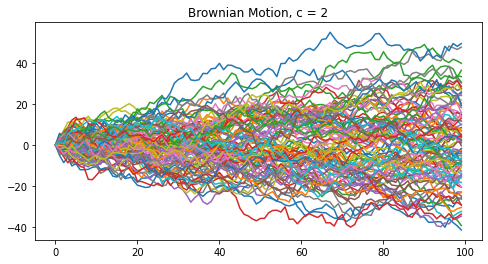

In [9]:
def BrownianMotion(c, n=50, seq_len=100):
    delta = np.random.randn(n, seq_len-1) * c
    points = np.cumsum(np.concatenate([np.zeros((n, 1)), delta], axis=-1), axis=-1)
    return points

def plot_BrownianMotion(c, n, seq_len):
    points = BrownianMotion(c, n, seq_len)
    x = range(seq_len)
    fig = plt.figure(figsize=(8,4))
    for i in range(n):
        plt.plot(x, points[i, :])
    plt.title('Brownian Motion, c = {}'.format(c))
    plt.show()

plot_BrownianMotion(2, 100, 100)

## Stochastic Differential Equation 1
$$
dX_t = \alpha (v - X_t) dt + \sigma dB_t
$$
$$
X_0 = x_0
$$

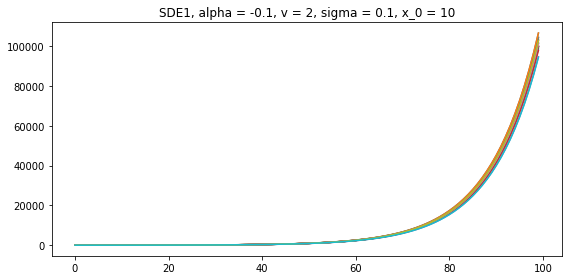

EX_1=10.8013, DX_1=0.0096


In [11]:
def SDE1(alpha, v, sigma, x_0, n=10, seq_len=50):
    d_B = np.random.randn(n, seq_len-1)
    X = np.zeros((n, seq_len))
    X[:, 0] = x_0
    for i in range(1, seq_len):
        X[:, i] = (1-alpha) * X[:, i-1] + alpha*v + sigma*d_B[:, i-1]
    return X

def SDE1_MonteCaro(alpha, v, sigma, x_0, n=1000):
    X_points = SDE1(alpha, v, sigma, x_0, n, 2)
    EX_1 = np.mean(X_points[:, 1])
    DX_1 = np.var(X_points[:, 1])
    return EX_1, DX_1

def plot_SDE1(alpha, v, sigma, x_0, n=10, seq_len=50):
    points = SDE1(alpha, v, sigma, x_0, n, seq_len)
    t = range(seq_len)
    fig = plt.figure(figsize=(8,4))
    for i in range(n):
        plt.plot(t, points[i, :])
    plt.title('SDE1, alpha = {}, v = {}, sigma = {}, x_0 = {}'.format(alpha, v, sigma, x_0))
    fig.tight_layout()
    plt.show()

alpha = -0.1
v = 2
sigma = 0.1
x_0 = 10
n = 20
seq_len = 100
n_MonteCaro = 1000

plot_SDE1(alpha, v, sigma, x_0, n, seq_len)
EX_1, DX_1 = SDE1_MonteCaro(alpha, v, sigma, x_0, n_MonteCaro)
print('EX_1={0:.4f}, DX_1={1:.4f}'.format(EX_1, DX_1))

## Stochastic Differential Equation 2
$$
dX_t = \alpha (v - X_t) dt + \sigma dB_t
$$
$$
dS_t = \theta (X_t - S_t) dt + \hat{\sigma}_1 dB_t + \hat{\sigma}_2 dW_t
$$
$$
X_0 = x_0, S_0 = s_0
$$

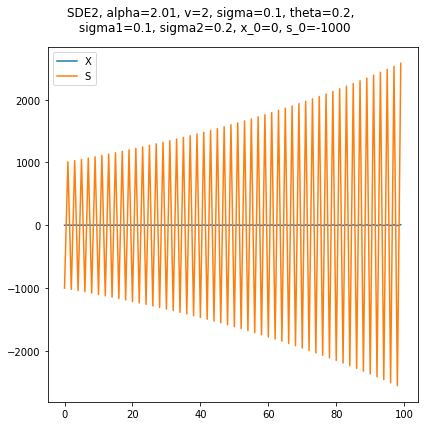

EX_1=4.0237, DX_1=0.0097, ES_1=1010.0106, DS_1=0.0521


In [101]:
def SDE2(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n=10, seq_len=50):
    d_B = np.random.randn(n, seq_len-1)
    d_W = np.random.randn(n, seq_len-1)
    X = np.zeros((n, seq_len))
    S = np.zeros((n, seq_len))
    X[:, 0] = x_0
    S[:, 0] = s_0
    for i in range(1, seq_len):
        X[:, i] = (1-alpha) * X[:, i-1] + alpha*v + sigma*d_B[:, i-1]
        S[:, i] = (1-alpha) * S[:, i-1] + theta*X[:, i-1] + sigma1*d_B[:, i-1] + sigma2*d_W[:, i-1]
    return X, S

def SDE2_MonteCaro(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n=1000):
    X_points, S_points = SDE2(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n, 2)
    EX_1 = np.mean(X_points[:, 1])
    DX_1 = np.var(X_points[:, 1])
    ES_1 = np.mean(S_points[:, 1])
    DS_1 = np.var(S_points[:, 1])
    return EX_1, DX_1, ES_1, DS_1


def plot_SDE2(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n=10, seq_len=50):
    X_points, S_points = SDE2(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n, seq_len)
    t = range(seq_len)
    fig = plt.figure(figsize=(6,6))
    if n != 1:
        row, col = n//2+1, 2
    else:
        row, col = 1, 1
    for i in range(n):
        plt.subplot(row, col, i+1)
        plt.plot(t, X_points[i, :], label='X')
        plt.plot(t, S_points[i, :], label='S')
        plt.legend()
    plt.suptitle('SDE2, alpha={}, v={}, sigma={}, theta={}, \n sigma1={}, sigma2={}, x_0={}, s_0={}' \
        .format(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0))
    fig.tight_layout()
    plt.show()

alpha = 2.01
v = 2
sigma, theta = 0.1, 0.2
sigma1, sigma2 = 0.1, 0.2
x_0, s_0 = 0, -1000
n = 1
seq_len = 100
n_MonteCaro = 1000

plot_SDE2(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n, seq_len)
EX_1, DX_1, ES_1, DS_1 = SDE2_MonteCaro(alpha, v, sigma, theta, sigma1, sigma2, x_0, s_0, n_MonteCaro)
print('EX_1={0:.4f}, DX_1={1:.4f}, ES_1={2:.4f}, DS_1={3:.4f}'.format(EX_1, DX_1, ES_1, DS_1))